# Modelos de Ruteo resueltos con docplex en Python

**Autor: Alessandro Oscar Huamán Molina**

Primero se debe instalar **IBM ILOG Optimization Studio** desde [acá](https://www.ibm.com/pe-es/products/ilog-cplex-optimization-studio). Luego de ello, leer la documentación de **docplex** que incluye instrucciones de instalación [acá](https://github.com/IBMDecisionOptimization/docplex-examples)

In [186]:
# Todas las liberías necesarias:
from docplex.mp.model import Model # importando la clase 'Model' de Programación Lineal
import numpy as np # álgebra lineal
import pandas as pd # DataFrames para manipular tablas de datos
import matplotlib.pyplot as plt # ploteo genérico
import networkx as nx # ploteo de conexiones en grafos
from scipy.spatial import distance_matrix # para sacar matriz de distancias

%matplotlib inline

## 1) TSP
Un clásico de la Investigación de Operaciones :)

Primero definimos nuestra matriz de distancias usando un DataFrame de la librería **pandas**:

In [2]:
nombres_ciudades = ['A','B','C','D','E','F','G','H','I','J','K'] # lista de 11 ciudades
tabla_distancias_tsp = pd.DataFrame(
    data = [[9000,266,160,188,117,283,244,93,62,218,117],
            [69,9000,47,254,64,278,72,276,132,215,205],
            [123,217,9000,222,193,47,57,90,205,208,200],
            [175,68,96,9000,46,46,106,111,140,246,129],
            [145,98,45,275,9000,192,295,125,132,231,296],
            [215,297,106,64,102,9000,186,135,122,82,277],
            [274,195,80,112,111,54,9000,155,248,223,105],
            [92,288,251,171,168,242,127,9000,207,46,141],
            [256,44,198,278,209,98,233,241,9000,276,117],
            [292,174,215,140,148,298,230,180,182,9000,116],
            [141,190,49,177,160,115,187,296,297,199,9000]],
    index = nombres_ciudades,
    columns = nombres_ciudades
)

print('Tabla de distancias:')
tabla_distancias_tsp # Ver

Tabla de distancias:


,A,B,C,D,E,F,G,H,I,J,K
A,9000,266,160,188,117,283,244,93,62,218,117
B,69,9000,47,254,64,278,72,276,132,215,205
C,123,217,9000,222,193,47,57,90,205,208,200
D,175,68,96,9000,46,46,106,111,140,246,129
E,145,98,45,275,9000,192,295,125,132,231,296
F,215,297,106,64,102,9000,186,135,122,82,277
G,274,195,80,112,111,54,9000,155,248,223,105
H,92,288,251,171,168,242,127,9000,207,46,141
I,256,44,198,278,209,98,233,241,9000,276,117
J,292,174,215,140,148,298,230,180,182,9000,116


Lo interesante es que el objeto **data_tsp** puede venir de múltiples hojas de un gran documento de Excel, simplemente se debe importar. Acá creé la matriz de forma manual, pero si hacemos un *loop* para importar los archivos de alguna carpeta, entonces podemos ahorrar muchísimo tiempo y correr muchos modelos :D.

Ahora que tenemos los datos, construímos el modelo:

In [3]:
# Creamos nuestra instancia del modelo:
m = Model(name = 'TSP_tucker_miller_zemlin')

In [4]:
# Parámetros del modelo (análogo a los set's y param's de AMPL). Los definimos de una vez para tener todo ordenado y fácil de iterar

# SET's:
indices_nodos = nombres_ciudades
cantidad_nodos = len(nombres_ciudades)

# VAR's:
# Lo de abajo se llama comprensión de diccionario! Nótese que eliminamos todos los i==j, ahorrando variables y tiempo de procesamiento.
# Esto es CRUCIAL para que un modelo del tipo NP-Hard corra en un tiempo razonable!
x = {(i,j): m.binary_var(name='x_{0}_{1}'.format(i,j)) for i in indices_nodos for j in indices_nodos if i!=j}
u = {i: m.integer_var(name='u_{0}'.format(i)) for i in indices_nodos}

# Función Objetivo:
m.minimize(
    m.sum(
        x[i,j] * tabla_distancias_tsp.loc[i,j] for i in indices_nodos for j in indices_nodos if i!=j
    )
)

In [5]:
# INFO del modelo:
m.print_information()

Model: TSP_tucker_miller_zemlin
 - number of variables: 121
   - binary=110, integer=11, continuous=0
 - number of constraints: 0
   - linear=0
 - parameters: defaults


In [6]:
# Revisamos la función objetivo:
m.objective_expr

docplex.mp.LinearExpr(266x_A_B+160x_A_C+188x_A_D+117x_A_E+283x_A_F+244x_A_G+93x_A_H+62x_A_I+218x_A_J+117x_A_K+69x_B_A+47x_B_C+254x_B_D+64x_B_E+278x_B_F+72x_B_G+276x_B_H+132x_B_I+215x_B_J+205x_B_K+123x_C_A+217x_C_B+222x_C_D+193x_C_E+47x_C_F+57x_C_G+90x_C_H+205x_C_I+208x_C_J+200x_C_K+175x_D_A+68x_D_B+96x_D_C+46x_D_E+46x_D_F+106x_D_G+111x_D_H+140x_D_I+246x_D_J+129x_D_K+145x_E_A+98x_E_B+45x_E_C+275x_E_D+192x_E_F+295x_E_G+125x_E_H+132x_E_I+231x_E_J+296x_E_K+215x_F_A+297x_F_B+106x_F_C+64x_F_D+102x_F_E+186x_F_G+135x_F_H+122x_F_I+82x_F_J+277x_F_K+274x_G_A+195x_G_B+80x_G_C+112x_G_D+111x_G_E+54x_G_F+155x_G_H+248x_G_I+223x_G_J+105x_G_K+92x_H_A+288x_H_B+251x_H_C+171x_H_D+168x_H_E+242x_H_F+127x_H_G+207x_H_I+46x_H_J+141x_H_K+256x_I_A+44x_I_B+198x_I_C+278x_I_D+209x_I_E+98x_I_F+233x_I_G+241x_I_H+276x_I_J+117x_I_K+292x_J_A+174x_J_B+215x_J_C+140x_J_D+148x_J_E+298x_J_F+230x_J_G+180x_J_H+182x_J_I+116x_J_K+141x_K_A+190x_K_B+49x_K_C+177x_K_D+160x_K_E+115x_K_F+187x_K_G+296x_K_H+297x_K_I+199x_K_J)

In [7]:
# RESTRICCIONES:

# Entrada:
for j in indices_nodos:
    m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == 1, 
                     ctname='entrada_{0}'.format(j))

# Salida:
for i in indices_nodos:
    m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == 1, 
                     ctname='salida_{0}'.format(i))

# Subtours:
for i in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0')
    for j in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0')
        if i!=j:
            m.add_constraint(u[i] - u[j] + cantidad_nodos * x[i,j] <= cantidad_nodos - 1, 
                             ctname='subtour_{0}_{1}'.format(i, j))

In [8]:
# INFO del modelo:
m.print_information()

Model: TSP_tucker_miller_zemlin
 - number of variables: 121
   - binary=110, integer=11, continuous=0
 - number of constraints: 112
   - linear=112
 - parameters: defaults


In [9]:
# Podemos inspeccionar ciertas restricciones para detectar errores:
m.get_constraint_by_index(0)

docplex.mp.LinearConstraint[entrada_A](x_B_A+x_C_A+x_D_A+x_E_A+x_F_A+x_G_A+x_H_A+x_I_A+x_J_A+x_K_A,EQ,1)

De un tutorial de IBM se conoce que:
> Users can change the algorithm by editing the lpmethod parameter of the model. We won't go into details here, it suffices to know this parameter accepts an integer from 0 to 6, where 0 denotes automatic choice of the algorithm, 1 is for primal simplex, 2 is for dual simplex, and 4 is for barrier...

>For example, choosing the barrier algorithm is done by setting value 4 to this parameter. We access the parameters property of the model and from there, assign the lpmethod parameter

In [10]:
# Corremos la optimización:
# m.parameters.lpmethod = 0 # podemos cambiarlo a 1, 2, 4, etc
m.solve(log_output=True) # activamos 'log_output' para mostrar el progreso

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 1 columns.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.22 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0      743.6364    12                    743.6364       22         
      0

docplex.mp.solution.SolveSolution(obj=770,values={x_A_H:1,x_B_A:1,x_C_G:..

In [11]:
# Mostrar resultados de la optimización:
m.print_solution()

objective: 770
  x_A_H=1
  x_B_A=1
  x_C_G=1
  x_D_E=1
  x_E_I=1
  x_F_D=1
  x_G_F=1
  x_H_J=1
  x_I_B=1
  x_J_K=1
  x_K_C=1
  u_B=9
  u_C=3
  u_D=6
  u_E=7
  u_F=5
  u_G=4
  u_I=8
  u_J=1
  u_K=2


Como nos interesan las variables **x_nodo1_nodo2**, aprovechamos la estructura de diccionario arriba y creamos una matriz binaria:

In [12]:
# Tabla de distancias a modo de solución:
conexiones = list(
    map(
        lambda x: tuple(x.split('_')),
        [
            i[2:] for i in list(m.solution.as_dict().keys()) if i[0] == 'x' # magia!
        ]
    )
)

conexiones # Ver

[('A', 'H'),
 ('B', 'A'),
 ('C', 'G'),
 ('D', 'E'),
 ('E', 'I'),
 ('F', 'D'),
 ('G', 'F'),
 ('H', 'J'),
 ('I', 'B'),
 ('J', 'K'),
 ('K', 'C')]

In [13]:
matriz_conexiones = pd.DataFrame(data=np.zeros_like(tabla_distancias_tsp.copy().values), 
                                 index=nombres_ciudades, 
                                 columns=nombres_ciudades)
for i,j in conexiones:
    matriz_conexiones.loc[i,j] = 1

matriz_conexiones # Ver

,A,B,C,D,E,F,G,H,I,J,K
A,0,0,0,0,0,0,0,1,0,0,0
B,1,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,1,0,0,0,0
D,0,0,0,0,1,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,1,0,0
F,0,0,0,1,0,0,0,0,0,0,0
G,0,0,0,0,0,1,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,1,0
I,0,1,0,0,0,0,0,0,0,0,0
J,0,0,0,0,0,0,0,0,0,0,1


### Importancia de las funciones:
Dado que el objetivo es ganar flexibilidad para ejecutar una gran cantidad de experimentos, es mejor encapsular todas las operaciones previas en funciones reproducibles:

In [234]:
def ModeloTSP(dataframe_distancias, etiquetas_nodos, str_nombre_modelo):
    """
    Devuelve un objeto 'Model' de CPLEX que resuelve el TSP con la formulación propuesta por Tucker-Miller-Zemlin.
    """
    # Creamos nuestra instancia del modelo:
    m = Model(name = str_nombre_modelo)
    
    cantidad_nodos = len(etiquetas_nodos)
    
    ## Parámetros del modelo:
    # SET's:
    indices_nodos = etiquetas_nodos.copy()

    # VAR's:
    # Lo de abajo se llama comprensión de diccionario! Nótese que eliminamos todos los i==j, ahorrando variables y tiempo
    x = {(i,j): m.binary_var(name='x_{0}_{1}'.format(i,j)) for i in indices_nodos for j in indices_nodos if i!=j}
    u = {i: m.integer_var(name='u_{0}'.format(i)) for i in indices_nodos}

    # Función Objetivo:
    m.minimize(
        m.sum(
            x[i,j] * dataframe_distancias.loc[i,j] for i in indices_nodos for j in indices_nodos if i!=j
        )
    )
    
    ## RESTRICCIONES:
    # Entrada:
    for j in indices_nodos:
        m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == 1, 
                         ctname='entrada_{0}'.format(j))

    # Salida:
    for i in indices_nodos:
        m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == 1, 
                         ctname='salida_{0}'.format(i))

    # Subtours:
    for i in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0')
        for j in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0')
            if i!=j:
                m.add_constraint(u[i] - u[j] + cantidad_nodos * x[i,j] <= cantidad_nodos - 1, 
                                 ctname='subtour_{0}_{1}'.format(i, j))
    
    print(m.print_information())
    
    return m


def ObtenerMatrizViajes(dataframe_distancias, etiquetas_nodos, modelo_resuelto):
    """
    Obtenemos la matriz de viajes, el cual es el resultado del modelo TSP Tucker-Miller-Zemlin.
    """
    # Obtenemos las conexiones a modo de lista:
    conexiones = list(
        map(
            lambda x: tuple(x.split('_')),
            [
                i[2:] for i in list(modelo_resuelto.solution.as_dict().keys()) if i[0] == 'x' # magia!
            ]
        )
    )
    
    # Construimos la matriz binaria de conexiones:
    matriz_conexiones = pd.DataFrame(data=np.zeros_like(dataframe_distancias.copy().values), 
                                     index=etiquetas_nodos, 
                                     columns=etiquetas_nodos)
    for i,j in conexiones:
        matriz_conexiones.loc[i,j] = 1

    return matriz_conexiones


def PlotearGrafoViajes(dataframe_matriz_viajes):
    """
    Graficamos un grafo de conexiones que representa la ruta resultante de la optimización lineal
    """
    G = nx.from_pandas_adjacency(dataframe_matriz_viajes, 
                                 create_using=nx.MultiDiGraph()) # Grafo dirigido!!!!
    nx.draw(G, with_labels=True)
    return G

def CrearTSPOptimizarObtenerViajesPlotearGrafo(dataframe_distancias, etiquetas_nodos, str_nombre_modelo):
    """
    Realiza el procesamiento completo!
    """
    print("========================= CREANDO MODELO =========================")
    modelo_tsp = ModeloTSP(dataframe_distancias=dataframe_distancias,
                           etiquetas_nodos=etiquetas_nodos, 
                           str_nombre_modelo=str_nombre_modelo)
    
    print("======================= OPTIMIZANDO MODELO =======================")
    modelo_tsp.solve(log_output=True)
    
    print("============================ SOLUCIÓN ============================")
    modelo_tsp.print_solution()
    
    print("=================== OBTENIENDO MATRIZ DE VIAJES ==================")
    viajes_modelo = ObtenerMatrizViajes(dataframe_distancias=dataframe_distancias,
                                        etiquetas_nodos=etiquetas_nodos, 
                                        modelo_resuelto=modelo_tsp)
    print(viajes_modelo)
    
    print("==================== CREANDO GRAFO DE VIAJES =====================")
    grafo_viajes = PlotearGrafoViajes(dataframe_matriz_viajes=viajes_modelo)
    
    return modelo_tsp, viajes_modelo, grafo_viajes

Usando las funciones de arriba, volvemos a crear un modelo y lo optimizamos:

In [15]:
# Creando el modelo:
modelo_tsp_2 = ModeloTSP(dataframe_distancias=tabla_distancias_tsp, 
                         etiquetas_nodos=nombres_ciudades, 
                         str_nombre_modelo='TSP_2')

Model: TSP_2
 - number of variables: 121
   - binary=110, integer=11, continuous=0
 - number of constraints: 112
   - linear=112
 - parameters: defaults
None


In [16]:
# Resolviendo el modelo:
modelo_tsp_2.solve(log_output=True)
print("============================ SOLUCIÓN ============================")
modelo_tsp_2.print_solution()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 1 columns.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.22 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0      743.6364    12                    743.6364       22         
      0

In [17]:
# Mostrando matriz de viajes:
viajes_modelo_2 = ObtenerMatrizViajes(dataframe_distancias=tabla_distancias_tsp,
                                      etiquetas_nodos=nombres_ciudades, 
                                      modelo_resuelto=modelo_tsp_2)

viajes_modelo_2

,A,B,C,D,E,F,G,H,I,J,K
A,0,0,0,0,0,0,0,1,0,0,0
B,1,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,1,0,0,0,0
D,0,0,0,0,1,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,1,0,0
F,0,0,0,1,0,0,0,0,0,0,0
G,0,0,0,0,0,1,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,1,0
I,0,1,0,0,0,0,0,0,0,0,0
J,0,0,0,0,0,0,0,0,0,0,1


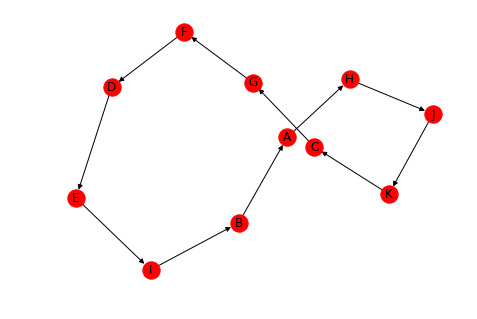

In [18]:
PlotearGrafoViajes(dataframe_matriz_viajes=viajes_modelo_2)

Probamos la última función, la cual resume todo el pipeline de procesamiento:

========================= CREANDO MODELO =========================
Model: TSP_3
 - number of variables: 121
   - binary=110, integer=11, continuous=0
 - number of constraints: 112
   - linear=112
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 1 columns.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 

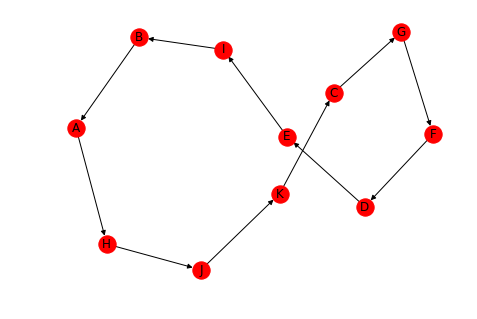

In [19]:
modelo_3, viajes_3, grafo_viajes_3 = CrearTSPOptimizarObtenerViajesPlotearGrafo(dataframe_distancias=tabla_distancias_tsp,
                                                                                etiquetas_nodos=nombres_ciudades, 
                                                                                str_nombre_modelo="TSP_3")

Nos percatamos que usando la función de arriba **podemos ejecutar todo el proceso completo de manera ordenada y sin inconvenientes**. Por ello se preferirá esta forma de trabajar de aquí en adelante.

## m-TSP
TSP con múltiples rutas. Se define un número **K** de vehículos que deben generar **K** rutas para visitar todos los nodos.

In [20]:
# FUNCIONES COMPLETAS:
def Modelo_M_TSP(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas, str_nombre_modelo):
    """
    Devuelve un objeto 'Model' de CPLEX que resuelve el m-TSP con la formulación Tucker-Miller-Zemlin **extendida**.
    """
    # Creamos nuestra instancia del modelo:
    m = Model(name = str_nombre_modelo)
    
    cantidad_nodos = len(etiquetas_nodos)
    
    ## Parámetros del modelo:
    # SET's:
    indices_nodos = etiquetas_nodos.copy()
    indices_nodos.remove(str_nombre_depot)
    indices_nodos.insert(0,str_nombre_depot) # ponemos el depot al inicio

    # VAR's:
    # Lo de abajo se llama comprensión de diccionario! Nótese que eliminamos todos los i==j, ahorrando variables y tiempo
    x = {(i,j): m.binary_var(name='x_{0}_{1}'.format(i,j)) for i in indices_nodos for j in indices_nodos if i!=j}
    u = {i: m.integer_var(name='u_{0}'.format(i)) for i in indices_nodos}

    # Función Objetivo:
    m.minimize(
        m.sum(
            x[i,j] * dataframe_distancias.loc[i,j] for i in indices_nodos for j in indices_nodos if i!=j
        )
    )
    
    ## RESTRICCIONES:
    # Entrada:
    for j in indices_nodos:
        if j == str_nombre_depot:
            m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == num_rutas, 
                             ctname='entrada_{0}'.format(j))
        else:
            m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == 1, 
                             ctname='entrada_{0}'.format(j))

    # Salida:
    for i in indices_nodos:
        if i == str_nombre_depot:
            m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == num_rutas, 
                             ctname='salida_{0}'.format(i))
        else:
            m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == 1, 
                             ctname='salida_{0}'.format(i))

    # Subtours:
    for i in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
        for j in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
            if i!=j:
                m.add_constraint(u[i] - u[j] + cantidad_nodos * x[i,j] <= cantidad_nodos - 1, 
                                 ctname='subtour_{0}_{1}'.format(i, j))
    
    print(m.print_information())
    
    return m

def Crear_M_TSPOptimizarObtenerViajesPlotearGrafo(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas,
                                                  str_nombre_modelo):
    """
    Realiza el procesamiento completo!
    """
    print("========================= CREANDO MODELO =========================")
    modelo_m_tsp = Modelo_M_TSP(dataframe_distancias=dataframe_distancias,
                              etiquetas_nodos=etiquetas_nodos, 
                              str_nombre_depot=str_nombre_depot, 
                              num_rutas=num_rutas,
                              str_nombre_modelo=str_nombre_modelo)
    
    print("======================= OPTIMIZANDO MODELO =======================")
    modelo_m_tsp.solve(log_output=True)
    
    print("============================ SOLUCIÓN ============================")
    modelo_m_tsp.print_solution()
    
    print("=================== OBTENIENDO MATRIZ DE VIAJES ==================")
    viajes_modelo = ObtenerMatrizViajes(dataframe_distancias=dataframe_distancias,
                                        etiquetas_nodos=etiquetas_nodos, 
                                        modelo_resuelto=modelo_m_tsp)
    print(viajes_modelo)
    
    print("==================== CREANDO GRAFO DE VIAJES =====================")
    grafo_viajes = PlotearGrafoViajes(dataframe_matriz_viajes=viajes_modelo)
    
    return modelo_m_tsp, viajes_modelo, grafo_viajes

========================= CREANDO MODELO =========================
Model: M_TSP
 - number of variables: 121
   - binary=110, integer=11, continuous=0
 - number of constraints: 112
   - linear=112
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 1 columns.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.24 ticks)
Probing time = 0.00 sec. (0.19 ticks)
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 10 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.31 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 

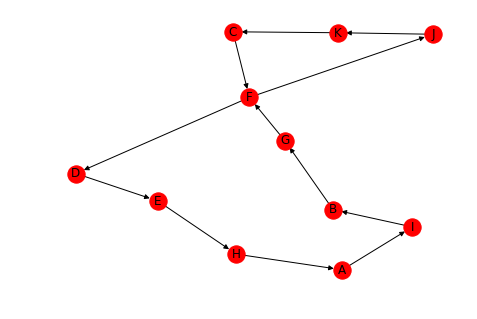

In [21]:
# Corriendo un M_TSP:
modelo_m_tsp, viajes_m_tsp, grafo_m_tsp = Crear_M_TSPOptimizarObtenerViajesPlotearGrafo(
    dataframe_distancias=tabla_distancias_tsp,
    etiquetas_nodos=nombres_ciudades, 
    str_nombre_depot='F', # elija el que más le guste :D
    num_rutas=2, # elija el que más le guste :D
    str_nombre_modelo="M_TSP")

## CVRP

Ruteo capacitado de vehículos. Se define un número **K** de vehículos con la misma capacidad limitada, la cual generará **K** rutas al intentar satisfacer las necesidades de distintos clientes.

In [22]:
# Recordemos que tenemos una matriz con las rutas:
tabla_distancias_tsp

,A,B,C,D,E,F,G,H,I,J,K
A,9000,266,160,188,117,283,244,93,62,218,117
B,69,9000,47,254,64,278,72,276,132,215,205
C,123,217,9000,222,193,47,57,90,205,208,200
D,175,68,96,9000,46,46,106,111,140,246,129
E,145,98,45,275,9000,192,295,125,132,231,296
F,215,297,106,64,102,9000,186,135,122,82,277
G,274,195,80,112,111,54,9000,155,248,223,105
H,92,288,251,171,168,242,127,9000,207,46,141
I,256,44,198,278,209,98,233,241,9000,276,117
J,292,174,215,140,148,298,230,180,182,9000,116


In [23]:
# Creamos un pd.Series de distancias:
np.random.seed(1234)
demanda_por_nodo = pd.Series(data = np.random.randint(1,9,size=len(nombres_ciudades)),
                             index = nombres_ciudades)
print(demanda_por_nodo) # Ver
print('Suma de todas las demandas: ', demanda_por_nodo.sum())

A    8
B    4
C    7
D    6
E    5
F    5
G    1
H    2
I    8
J    2
K    8
dtype: int32
Suma de todas las demandas:  56


El modelo CVRP implementado utiliza una familia de restricciones que eliminan *subtours*, basándose en la formulación TSP de Miller-Tucker-Zemlin (gracias a que ofrece una interesante propiedad polinomial). Esta fue adaptada del Paper **"Models, relaxations and exact approaches for
the capacitated vehicle routing problem"**, publicado el año 2002 por Paolo Toth y Danielle Vigo. Una copia gratuita de ello se encuentra acá: https://www.sciencedirect.com/science/article/pii/S0166218X01003511

![Extracto de "Models, relaxations and exact approaches for
the capacitated vehicle routing problem"](cvrp_mtz.png)

In [24]:
# FUNCIONES COMPLETAS:
def ModeloCVRP(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas, capacidad_vehiculo,
               serie_demandas_nodos, str_nombre_modelo):
    """
    Devuelve un objeto 'Model' de CPLEX que resuelve el CVRP, usando una familia de restricciones
    que eliminan subtours que extiende la formulación TSP de Tucker-Miller-Zemlin, incorporando capacidades.
    
    Nótese que 'num_rutas' es igual a la cantidad de vehículos que se cuenta.
    """
    # Creamos nuestra instancia del modelo:
    m = Model(name = str_nombre_modelo)
    
    ## Parámetros del modelo:
    # SET's:
    indices_nodos = etiquetas_nodos.copy()
    indices_nodos.remove(str_nombre_depot)
    indices_nodos.insert(0,str_nombre_depot) # ponemos el depot al inicio

    # VAR's:
    # Lo de abajo se llama comprensión de diccionario! Nótese que eliminamos todos los i==j, ahorrando variables y tiempo
    x = {(i,j): m.binary_var(name='x_{0}_{1}'.format(i,j)) for i in indices_nodos for j in indices_nodos if i!=j}
    # Nótese que ahora el 'u' es una variable continua, en comparación con la formulación TSP. Agregamos cota inf y sup:
    u = {i: m.continuous_var(name='u_{0}'.format(i), 
                             lb=serie_demandas_nodos[i],
                             ub=capacidad_vehiculo) for i in indices_nodos if i!=str_nombre_depot}

    # Función Objetivo:
    m.minimize(
        m.sum(
            x[i,j] * dataframe_distancias.loc[i,j] for i in indices_nodos for j in indices_nodos if i!=j
        )
    )
    
    ## RESTRICCIONES:
    # Entrada:
    for j in indices_nodos:
        if j == str_nombre_depot:
            m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == num_rutas, 
                             ctname='entrada_{0}'.format(j))
        else:
            m.add_constraint(m.sum(x[i,j] for i in indices_nodos if i!=j) == 1, 
                             ctname='entrada_{0}'.format(j))

    # Salida:
    for i in indices_nodos:
        if i == str_nombre_depot:
            m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == num_rutas, 
                             ctname='salida_{0}'.format(i))
        else:
            m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == 1, 
                             ctname='salida_{0}'.format(i))

    # Subtours:
    for i in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
        for j in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
            if i!=j and (serie_demandas_nodos[i] + serie_demandas_nodos[j] <= capacidad_vehiculo):
                m.add_constraint(u[i] - u[j] + capacidad_vehiculo * x[i,j] <= capacidad_vehiculo - serie_demandas_nodos[j], 
                                 ctname='subtour_{0}_{1}'.format(i, j))
    
    print(m.print_information())
    
    return m

def CrearCVRPOptimizarObtenerViajesPlotearGrafo(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas,
                                                capacidad_vehiculo, serie_demandas_nodos, str_nombre_modelo):
    """
    Realiza el procesamiento completo! Nótese que 'num_rutas' es igual a la cantidad de vehículos que se cuenta.
    """
    print("========================= CREANDO MODELO =========================")
    modelo_cvrp = ModeloCVRP(dataframe_distancias=dataframe_distancias,
                              etiquetas_nodos=etiquetas_nodos, 
                              str_nombre_depot=str_nombre_depot, 
                              num_rutas=num_rutas,
                              capacidad_vehiculo=capacidad_vehiculo,
                              serie_demandas_nodos=serie_demandas_nodos,
                              str_nombre_modelo=str_nombre_modelo)
    
    print("======================= OPTIMIZANDO MODELO =======================")
    modelo_cvrp.solve(log_output=True)
    
    print("============================ SOLUCIÓN ============================")
    modelo_cvrp.print_solution()
    
    print("=================== OBTENIENDO MATRIZ DE VIAJES ==================")
    viajes_modelo = ObtenerMatrizViajes(dataframe_distancias=dataframe_distancias,
                                        etiquetas_nodos=etiquetas_nodos, 
                                        modelo_resuelto=modelo_cvrp)
    print(viajes_modelo)
    
    print("==================== CREANDO GRAFO DE VIAJES =====================")
    grafo_viajes = PlotearGrafoViajes(dataframe_matriz_viajes=viajes_modelo)
    
    return modelo_cvrp, viajes_modelo, grafo_viajes

========================= CREANDO MODELO =========================
Model: CVRP
 - number of variables: 120
   - binary=110, integer=0, continuous=10
 - number of constraints: 112
   - linear=112
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.25 ticks)
Found incumbent of value 1767.000000 after 0.03 sec. (0.81 ticks)
Probing time = 0.00 sec. (0.26 ticks)
Tried aggregator 1 time.
Reduced MIP has 112 rows, 120 columns, and 490 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.26 ticks)
Clique table members: 143.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: determinist

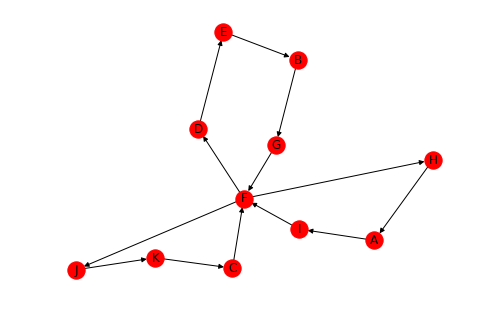

In [25]:
# Corriendo un CVRP:
modelo_cvrp, viajes_cvrp, grafo_cvrp = CrearCVRPOptimizarObtenerViajesPlotearGrafo(
    dataframe_distancias=tabla_distancias_tsp,
    etiquetas_nodos=nombres_ciudades, 
    str_nombre_depot='F', 
    num_rutas=3, 
    capacidad_vehiculo=20,
    serie_demandas_nodos=demanda_por_nodo,
    str_nombre_modelo="CVRP")

## VRPTW

Ruteo capacitado de vehículos con ventanas de tiempo. Se define un número **K** de vehículos con la misma capacidad limitada, la cual generará **K** rutas al intentar satisfacer las necesidades de distintos clientes, **dentro de una ventana de tiempo definida por nodo**.

In [26]:
# Prueba 1:
[1,2,3,4,5][1:-1]

[2, 3, 4]

In [39]:
# Prueba 2:
def aoc(dataframe_distancias):
    dataframe_distancias = dataframe_distancias.copy()
    dataframe_distancias.loc['F_inicio',:] = dataframe_distancias.loc['F',:]
    dataframe_distancias.loc[:,'F_inicio'] = dataframe_distancias.loc[:,'F']
    dataframe_distancias.loc['F_fin',:] = dataframe_distancias.loc['F',:]
    dataframe_distancias.loc[:,'F_fin'] = dataframe_distancias.loc[:,'F']
    print(dataframe_distancias)

aoc(tabla_distancias_tsp)
print(tabla_distancias_tsp) # no hay modificación alguna! (eso es bueno)

               A       B       C       D       E       F       G       H  \
A         9000.0   266.0   160.0   188.0   117.0   283.0   244.0    93.0   
B           69.0  9000.0    47.0   254.0    64.0   278.0    72.0   276.0   
C          123.0   217.0  9000.0   222.0   193.0    47.0    57.0    90.0   
D          175.0    68.0    96.0  9000.0    46.0    46.0   106.0   111.0   
E          145.0    98.0    45.0   275.0  9000.0   192.0   295.0   125.0   
F          215.0   297.0   106.0    64.0   102.0  9000.0   186.0   135.0   
G          274.0   195.0    80.0   112.0   111.0    54.0  9000.0   155.0   
H           92.0   288.0   251.0   171.0   168.0   242.0   127.0  9000.0   
I          256.0    44.0   198.0   278.0   209.0    98.0   233.0   241.0   
J          292.0   174.0   215.0   140.0   148.0   298.0   230.0   180.0   
K          141.0   190.0    49.0   177.0   160.0   115.0   187.0   296.0   
F_inicio   215.0   297.0   106.0    64.0   102.0  9000.0   186.0   135.0   
F_fin      2

In [27]:
# # FUNCIONES COMPLETAS:
# def ModeloVRPTW(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas, capacidad_vehiculo,
#                serie_demandas_nodos, str_nombre_modelo):
#     """
#     Devuelve un objeto 'Model' de CPLEX que resuelve el VRPTW, considerando capacidades y ventanas de tiempo para
#     la atención de los nodos.
    
#     Nótese que 'num_rutas' es igual a la cantidad de vehículos que se cuenta.
    
#     El código está inspirado en la formulación mencionada por Toth y Vigo (2002) y la codificación en CPLEX nativo
#     hallada aquí: https://github.com/afurculita/cplex-vrptw-implementation/blob/master/VRPTW.mod
#     """
#     # Adaptamos el 'dataframe_distancias' a la indexación del conjunto de nodos mencionada en Toth y Vigo (2002):
#     # Esto implica un conjunto {0,...,n+1} donde 0 y n+1 hacen referencia al depot, mientras que 1,...,n hacen
#     # referencia a los clientes cuyas demandas debemos satisfacer. Esto afecta al objeto 'indices_nodos', luego.
#     dataframe_distancias = dataframe_distancias.copy()
#     dataframe_distancias.loc[str_nombre_depot + '_inicio',:] = dataframe_distancias.loc[str_nombre_depot,:]
#     dataframe_distancias.loc[:,str_nombre_depot + '_inicio'] = dataframe_distancias.loc[:,str_nombre_depot]
#     dataframe_distancias.loc[str_nombre_depot + '_fin',:] = dataframe_distancias.loc[str_nombre_depot,:]
#     dataframe_distancias.loc[:,str_nombre_depot + '_fin'] = dataframe_distancias.loc[:,str_nombre_depot]
    
#     # Creamos nuestra instancia del modelo:
#     m = Model(name = str_nombre_modelo)
    
#     ## Parámetros del modelo:
#     # SET's:
#     indices_nodos = etiquetas_nodos.copy()
#     indices_nodos.remove(str_nombre_depot)
#     indices_nodos.insert(0,str_nombre_depot + '_inicio') # ponemos el depot al inicio
#     indices_nodos.insert(-1,str_nombre_depot + '_fin') # repetimos el depot al final
#     indices_rutas = list(map(lambda x: 'Ruta' + str(x), list(range(1,num_rutas+1))))

#     # VAR's:
#     # Lo de abajo se llama comprensión de diccionario! Nótese que eliminamos todos los i==j, ahorrando variables y tiempo
#     x = {(i,j,k): m.binary_var(name='x_{0}_{1}_{2}'.format(i,j,k)) 
#          for i in indices_nodos 
#          for j in indices_nodos 
#          for k in indices_rutas
#          if i!=j}
    

#     # Función Objetivo:
#     m.minimize(
#         m.sum(
#             x[i,j,k] * dataframe_distancias.loc[i,j] 
#             for i in indices_nodos 
#             for j in indices_nodos 
#             for k in indices_rutas
#             if i!=j
#         )
#     )
    
#     ## RESTRICCIONES:
#     # Cada nodo a una ruta:
#     for i in indices_nodos:
#         m.add_constraint(m.sum(x[i,j,k] for i in indices_nodos for k in indices_rutas if i!=j) == 1, 
#                          ctname='c_nodo_una_ruta_{0}_{1}_{2}'.format(i,j,k))
    
#     # Restricciones de flujo a seguir en cada ruta K (F1, F2 y F3):
#     for k in indices_rutas:
#         m.add_constraint(m.sum(x[str_nombre_depot + '_inicio',j,k] 
#                                for j in indices_nodos 
#                                if j!=str_nombre_depot + '_inicio')
#                          == 1,
#                         ctname='flujo_F1_{0}_{1}_{2}'.format(str_nombre_depot + '_inicio',j,k))
    
#     for k in indices_rutas:
#         for j in indices_rutas:
#             m.add_constraint(m.sum(x[i,j,k] for i in indices_nodos if i!=j) - 
#                              m.sum(x[j,i,k] for i in indices_nodos if i!=j)
#                              == 0,
#                             ctname='flujo_F2_{0}_{1}_{2}'.format(i,j,k))
    
#     for k in indices_rutas:
#         m.add_constraint(m.sum(x[i,str_nombre_depot + '_fin',k] 
#                                for i in indices_nodos 
#                                if i!=str_nombre_depot + '_fin')
#                          == 1,
#                         ctname='flujo_F3_{0}_{1}_{2}'.format(i,str_nombre_depot + '_fin',k))
    
#     # Restricciones de factibilidad de ventanas de tiempo (T1, T2 y T3):
    
    
#     # La demanda de una ruta no debe exceder la capacidad del vehículo:
#     for k in indices_rutas:
#         m.add_constraint(m.sum(serie_demandas_nodos[i] * x[i,j,k] 
#                                for i in indices_nodos[1:-1] # retiramos al depot
#                                for j in indices_nodos)
#                         <= capacidad_vehiculo,
#                         ctname = 'dem_menor_cap_{0}_{1}_{2}'.format(i,j,k))
    
    
    
# #     # Salida:
# #     for i in indices_nodos:
# #         if i == str_nombre_depot:
# #             m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == num_rutas, 
# #                              ctname='salida_{0}'.format(i))
# #         else:
# #             m.add_constraint(m.sum(x[i,j] for j in indices_nodos if i!=j) == 1, 
# #                              ctname='salida_{0}'.format(i))

# #     # Subtours:
# #     for i in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
# #         for j in indices_nodos[1:]: # tomamos a partir del segundo indice (empieza en '0'). Ignora el depot
# #             if i!=j and (serie_demandas_nodos[i] + serie_demandas_nodos[j] <= capacidad_vehiculo):
# #                 m.add_constraint(u[i] - u[j] + capacidad_vehiculo * x[i,j] <= capacidad_vehiculo - serie_demandas_nodos[j], 
# #                                  ctname='subtour_{0}_{1}'.format(i, j))
    
#     print(m.print_information())
    
#     return m

# def CrearVRPTWOptimizarObtenerViajesPlotearGrafo(dataframe_distancias, etiquetas_nodos, str_nombre_depot, num_rutas,
#                                                 capacidad_vehiculo, serie_demandas_nodos, str_nombre_modelo):
#     """
#     Realiza el procesamiento completo! Nótese que 'num_rutas' es igual a la cantidad de vehículos que se cuenta.
#     """
#     print("========================= CREANDO MODELO =========================")
#     modelo_vrptw = ModeloVRPTW(dataframe_distancias=dataframe_distancias,
#                               etiquetas_nodos=etiquetas_nodos, 
#                               str_nombre_depot=str_nombre_depot, 
#                               num_rutas=num_rutas,
#                               capacidad_vehiculo=capacidad_vehiculo,
#                               serie_demandas_nodos=serie_demandas_nodos,
#                               str_nombre_modelo=str_nombre_modelo)
    
#     print("======================= OPTIMIZANDO MODELO =======================")
#     modelo_vrptw.solve(log_output=True)
    
#     print("============================ SOLUCIÓN ============================")
#     modelo_vrptw.print_solution()
    
#     print("=================== OBTENIENDO MATRIZ DE VIAJES ==================")
#     viajes_modelo = ObtenerMatrizViajes(dataframe_distancias=dataframe_distancias,
#                                         etiquetas_nodos=etiquetas_nodos, 
#                                         modelo_resuelto=modelo_vrptw)
#     print(viajes_modelo)
    
#     print("==================== CREANDO GRAFO DE VIAJES =====================")
#     grafo_viajes = PlotearGrafoViajes(dataframe_matriz_viajes=viajes_modelo)
    
#     return modelo_vrptw, viajes_modelo, grafo_viajes

# Generando soluciones para los experimentos propuestos por el paper de Welling, Woll y Van Hoof (2019)

In [278]:
def GenerarEjemploGrafo(num_clientes, con_demandas=False):
    loc_xy = pd.DataFrame(data = np.random.random(size=(num_clientes+1,2)),
                         columns=['x','y']) # el primer indice ('0') SERÁ el depot
    if con_demandas:
        loc_xy['demanda'] = np.random.randint(1,10,size=num_clientes+1) # muestreados a partir de una dist unif discreta [1,9]
    
    # Agregamos etiquetas (en este caso '0' siempre será el depot):
    indices_generados = list(map(str, range(num_clientes + 1)))
    loc_xy.index = indices_generados
    return loc_xy

def GraficarCiudades(dataframe_localidades, tamano_punto=25):
    num_clientes = dataframe_localidades.shape[0] - 1
    plt.scatter(x = dataframe_localidades['x'],
                y = dataframe_localidades['y'], 
                s = [3.5*tamano_punto] + [tamano_punto] * num_clientes,
                c = ['r'] + ['b'] * num_clientes)
    return None

def GenerarTablaDistancias(dataframe_localidades, etiquetas_nodos):
    matriz_distancias_euclidianas = distance_matrix(dataframe_localidades[['x','y']], dataframe_localidades[['x','y']])
    tabla_distancias = pd.DataFrame(data = matriz_distancias_euclidianas, 
                                    index = etiquetas_nodos, 
                                    columns = etiquetas_nodos)
    return tabla_distancias

Suma de demandas:  235


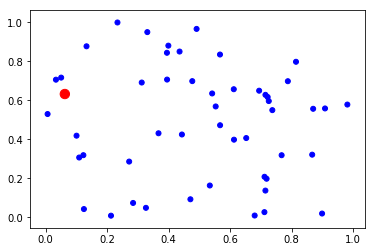

In [334]:
grafo_artif = GenerarEjemploGrafo(50, con_demandas=True)
print('Suma de demandas: ', grafo_artif['demanda'].sum())
distancias_grafo_artif = GenerarTablaDistancias(grafo_artif, grafo_artif.index)
GraficarCiudades(grafo_artif)

========================= CREANDO MODELO =========================
Model: CVRP_Grafo_Artificial
 - number of variables: 2600
   - binary=2550, integer=0, continuous=50
 - number of constraints: 2552
   - linear=2552
 - parameters: defaults
None
======================= OPTIMIZANDO MODELO =======================
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 2552 rows, 2600 columns, and 12450 nonzeros.
Reduced MIP has 2550 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (6.11 ticks)
Found incumbent of value 26.376320 after 0.03 sec. (27.19 ticks)
Probing time = 0.03 sec. (4.80 ticks)
Tried aggregator 1 time.
Reduced MIP has 2552 rows, 2600 columns, and 12450 nonzeros.
Reduced MIP has 2550 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (7.99 ticks)
Probing time = 0.02 sec. (4.79 ticks)
Clique table members: 1247.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic sea

 425400 340276        6.7460    84        7.2868        6.0748  4465221   16.63%
 433160 347986        6.8209    64        7.2868        6.0751  4543126   16.63%
 439564 355199        6.8000    50        7.2868        6.0754  4633935   16.62%
Elapsed time = 547.53 sec. (260020.26 ticks, tree = 1658.78 MB, solutions = 41)
 447447 364093        6.4324    60        7.2868        6.0758  4723596   16.62%
 456007 372235        6.9319    58        7.2868        6.0763  4802601   16.61%
 463686 378272        6.5122    43        7.2868        6.0771  4859218   16.60%
 470274 385664        6.5332   101        7.2868        6.0772  4939964   16.60%
 476947 392810        6.2869    99        7.2868        6.0775  5016551   16.59%
 484047 397993        6.9266    75        7.2868        6.0777  5075766   16.59%
 491071 406377        6.3411    82        7.2868        6.0781  5166586   16.59%
 499164 414382        6.6490    33        7.2868        6.0786  5248863   16.58%
 507854 422745        6.1370 

 1695724 1582133        6.6527    45        7.2868        6.1089 18364784   16.16%
 1703938 1590759        6.7184    69        7.2868        6.1090 18455024   16.16%
Elapsed time = 1963.66 sec. (908615.73 ticks, tree = 3491.20 MB, solutions = 41)
Nodefile size = 1441.72 MB (784.47 MB after compression)
 1711510 1598300        6.7401    73        7.2868        6.1091 18541322   16.16%
 1716850 1604334        6.9237    54        7.2868        6.1092 18615776   16.16%
 1726209 1609636        6.6163    66        7.2868        6.1093 18673740   16.16%
 1735133 1622226        6.7304    67        7.2868        6.1095 18818590   16.16%
 1740890 1627112        6.1671    93        7.2868        6.1097 18866409   16.15%
 1746998 1635172        6.5268    43        7.2868        6.1098 18966097   16.15%
 1757521 1639078        6.1971    69        7.2868        6.1099 19008851   16.15%
 1763589 1649232        6.3918    95        7.2868        6.1100 19134921   16.15%
 1769502 1655771        6.5464  

 2904264 2754230        6.6572    53        7.2868        6.1248 31948027   15.95%
 2911032 2771290        6.7079    71        7.2868        6.1249 32138760   15.94%
 2916563 2772039        7.0611    60        7.2868        6.1250 32147784   15.94%
 2921779 2781601        6.4227    81        7.2868        6.1251 32268293   15.94%
 2927617 2785211        6.4482    84        7.2868        6.1252 32306865   15.94%
Elapsed time = 3429.44 sec. (1557192.72 ticks, tree = 5280.33 MB, solutions = 41)
Nodefile size = 3229.82 MB (1388.91 MB after compression)
 2935691 2789981        6.6063    61        7.2868        6.1253 32364702   15.94%
 2948846 2801861        6.1486    85        7.2868        6.1253 32501287   15.94%
 2957348 2813721        6.7037    57        7.2868        6.1254 32626872   15.94%
 2962860 2823813        6.7162    80        7.2868        6.1255 32745787   15.94%
 2968105 2826619        6.9846    71        7.2868        6.1256 32776684   15.93%
 2973535 2832044        6.6949

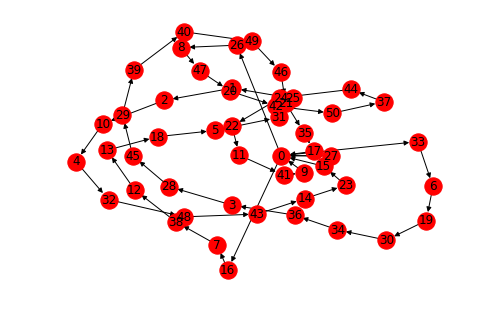

In [335]:
# CVRP 50 requiere 20 min para llegar a 16% y estancarse
modelo_art, viajes_art, plot_art = CrearCVRPOptimizarObtenerViajesPlotearGrafo(dataframe_distancias = distancias_grafo_artif, 
                                            etiquetas_nodos = list(grafo_artif.index),
                                            str_nombre_depot = '0',
                                            num_rutas = 4, 
                                            capacidad_vehiculo = 80,
                                            serie_demandas_nodos = grafo_artif['demanda'],
                                            str_nombre_modelo = 'CVRP_50_Grafo_Artificial')

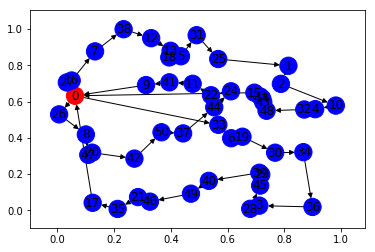

In [336]:
nx.draw_networkx(plot_art, 
                 pos = {i: (grafo_artif.loc[i,'x'], grafo_artif.loc[i,'y']) for i in list(grafo_artif.index)}, 
                 with_labels=True, 
                 node_color = ['r'] + ['b'] * (grafo_artif.shape[0]-1))

In [337]:
viajes_art

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
(distancias_grafo_artif * viajes_art).sum().sum()

7.286757455000405

In [341]:
viajes_art.loc['0',:].sum()

4.0

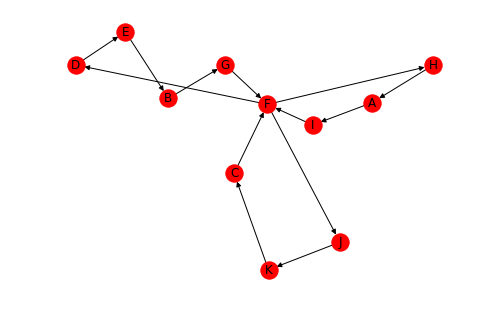

In [370]:
nx.draw(grafo_cvrp, with_labels=True)

In [380]:
list(nx.all_simple_paths(grafo_cvrp, 'F', 'C'))

[['F', 'J', 'K', 'C']]